### Double Well potential using OpenMM

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
%%capture
!conda install -c conda-forge openmm mdtraj parmed
!pip install py3dmol 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import openmm as mm

In [3]:
def run_simulation(n_steps=10000):
    "Simulate a single particle in the double well"
    
    system = mm.System()
    system.addParticle(1)# added particle with a unit mass
    force = mm.CustomExternalForce('2*(x-1)^2*(x+1)^2 + y^2')# defines the potential
    force.addParticle(0, [])
    system.addForce(force)
    integrator = mm.LangevinIntegrator(500, 1, 0.02) # Langevin integrator with 500K temperature, gamma=1, step size = 0.02
    context = mm.Context(system, integrator)
    context.setPositions([[0, 0, 0]])
    context.setVelocitiesToTemperature(500)
    x = np.zeros((n_steps, 3))
    
    for i in range(n_steps):
        x[i] = context.getState(getPositions=True).getPositions(asNumpy=True)._value
        integrator.step(1)
        
    return x

In [4]:
trajectory = run_simulation(25000)



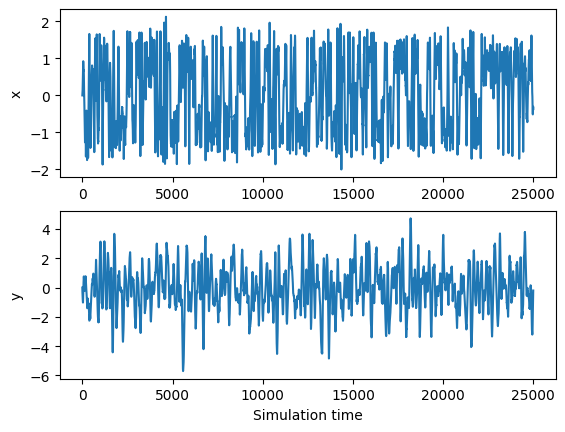

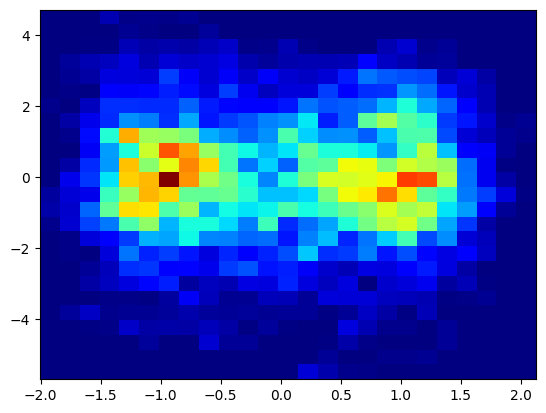

In [5]:
ylabels = ['x', 'y']

for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(trajectory[:, i])
    plt.ylabel(ylabels[i])
plt.xlabel('Simulation time')
plt.show()

plt.hist2d(trajectory[:, 0], trajectory[:, 1], bins=(25, 25), cmap=plt.cm.jet)
plt.show()

### Caclulate Free energy profile

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract x coordinate
x_positions = trajectory[:, 0]

# Histogram x positions
hist, bin_edges = np.histogram(x_positions, bins=100, density=True)

# Midpoints of bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Avoid log(0) by adding small constant
P_x = hist + 1e-12

# Physical constants
kB = 0.0019872041 # kcal/mol/K
T = 500 # K

# Free energy in kcal/mol
F_x = -kB * T * np.log(P_x)

# Shift minimum to zero for nicer plotting
F_x -= np.min(F_x)

# Plot
plt.plot(bin_centers, F_x)
plt.xlabel('x')
plt.ylabel('Free Energy (kcal/mol)')
plt.title('1D Free Energy Landscape along x')
plt.show()